In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
x, y = load_digits(return_X_y=True)

In [3]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [24]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.8, random_state=0)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [25]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='deprecated',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, random_state=0, solver='liblinear')

In [ ]:
x_test = scaler.transform(x_test)

In [26]:
y_pred = model.predict(x_test)
y_proba=model.predict_proba(x_test)

In [27]:
model.score(x_test, y_test)

0.9492350486787204

In [8]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]])

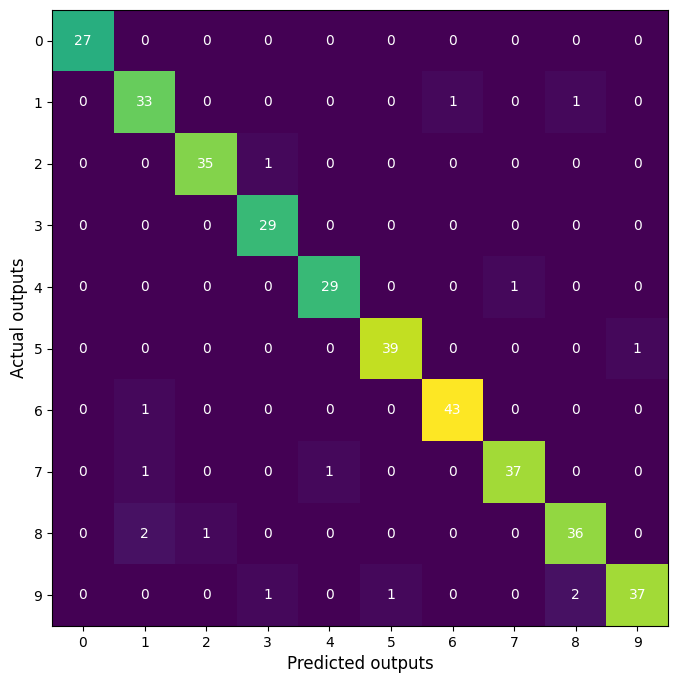

In [15]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.94      0.92        35
           2       0.97      0.97      0.97        36
           3       0.94      1.00      0.97        29
           4       0.97      0.97      0.97        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.92      0.92      0.92        39
           9       0.97      0.90      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



0.9989274691358024


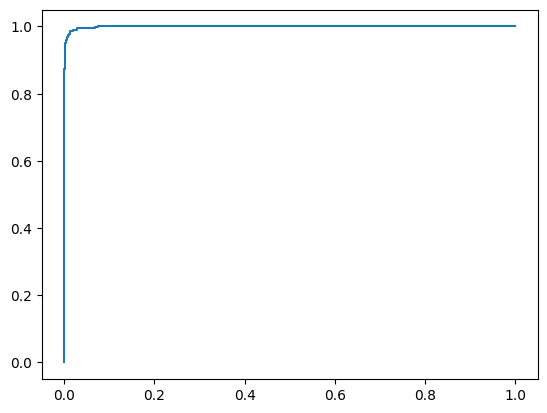

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
y_true_binarized=label_binarize(y_test,classes=[0,1,2,3,4,5,6,7,8,9])
n_classes=y_true_binarized.shape[1]
fpr=dict()
tpr=dict()
roc_auc=dict()

roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_true_binarized[:,i],np.array(y_proba)[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

fpr["micro"],tpr["micro"],_=roc_curve(y_true_binarized.ravel(),np.array(y_proba).ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

print(roc_auc["micro"])
plt.plot(fpr["micro"],tpr["micro"])
plt.show()